In [7]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr
from tensorflow.keras.models import load_model
import joblib
from joblib import load

# En este documento se predecirán nuevas gráficas con valores de fracción volumen, radio y espesor de la partícula nuevos

Carga del modelo normalizado

In [8]:
model = tf.keras.models.load_model('normalizado3.h5')

# Especificando los valores a usar

In [9]:
fracvol = 1
radio = 35
espesor = 150
longitud_de_onda = list(range(301, 901))

Creando diccionario

In [10]:
data = {
    "Longitud de onda": longitud_de_onda,
    "Fracvol": [fracvol] * len(longitud_de_onda),
    "Radio (nm)": [radio] * len(longitud_de_onda),
    "Espesor de la película (nm)": [espesor] * len(longitud_de_onda)
}

Creando DF

In [11]:
df  = pd.DataFrame(data)
df

,Longitud de onda,Fracvol,Radio (nm),Espesor de la película (nm)
0,301,1,35,150
1,302,1,35,150
2,303,1,35,150
3,304,1,35,150
4,305,1,35,150
...,...,...,...,...
595,896,1,35,150
596,897,1,35,150
597,898,1,35,150
598,899,1,35,150


Normalizando valores

In [12]:
scaler = joblib.load('minmax_scaler_X.pkl')
x = df.values
x_norm = scaler.fit_transform(x)

# Predicciones

In [13]:
predictions = model.predict(x_norm)

19/19 [==============================] - 0s 524us/step


In [14]:
df1 = pd.DataFrame(df, columns = ['Longitud de onda', 'Fracvol', 'Radio (nm)', 'Espesor de la película (nm)'])
df2 = pd.DataFrame(predictions , columns = ['Índice de absorción'])

In [15]:
result_df = pd.concat([df1, df2], axis=1)
result_df

,Longitud de onda,Fracvol,Radio (nm),Espesor de la película (nm),Índice de absorción
0,301,1,35,150,0.984113
1,302,1,35,150,0.962110
2,303,1,35,150,0.940107
3,304,1,35,150,0.918104
4,305,1,35,150,0.899569
...,...,...,...,...,...
595,896,1,35,150,0.126789
596,897,1,35,150,0.126993
597,898,1,35,150,0.127198
598,899,1,35,150,0.127403


# Gráfica con valores normalizados

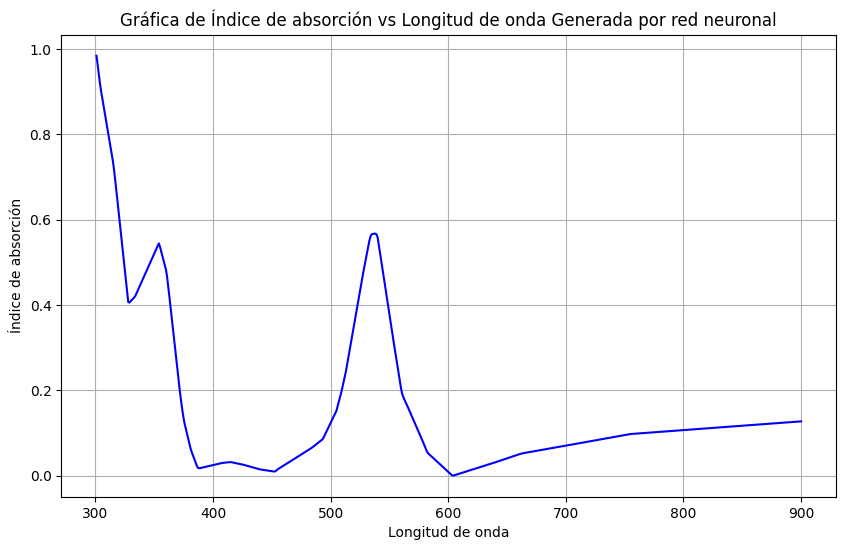

In [16]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = result_df[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda Generada por red neuronal')
plt.grid(True)
plt.show()

Para desnormalizar sacaremos la media y desviacion estandar de los datos con los que la red fue entrenada

In [17]:
files = [file for file in os.listdir('./parametros')]

param = pd.DataFrame()
for file in files:
  df = pd.read_csv('./parametros/'+file)
  param = pd.concat([param, df], axis= 0)

In [18]:
minimo = param['Índice de absorción'].min()
maximo = param['Índice de absorción'].max()

In [19]:
factor = 0.5

In [20]:
result_df['Índice de absorción'] = (result_df['Índice de absorción'] * (maximo - minimo)*factor) + minimo
result_df

,Longitud de onda,Fracvol,Radio (nm),Espesor de la película (nm),Índice de absorción
0,301,1,35,150,0.067977
1,302,1,35,150,0.066457
2,303,1,35,150,0.064938
3,304,1,35,150,0.063418
4,305,1,35,150,0.062137
...,...,...,...,...,...
595,896,1,35,150,0.008758
596,897,1,35,150,0.008772
597,898,1,35,150,0.008786
598,899,1,35,150,0.008800


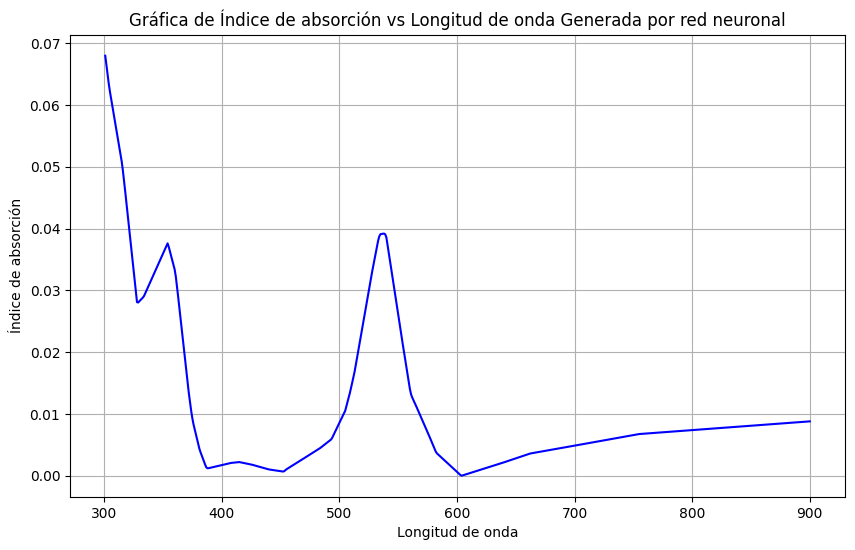

In [21]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = result_df[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda Generada por red neuronal')
plt.grid(True)
plt.show()

# Comprobando si son iguales

In [22]:
fracvol = 1
radio = 6
espesor = 100
longitud_de_onda = list(range(301, 901))
data = {
    "Longitud de onda": longitud_de_onda,
    "Fracvol": [fracvol] * len(longitud_de_onda),
    "Radio (nm)": [radio] * len(longitud_de_onda),
    "Espesor de la película (nm)": [espesor] * len(longitud_de_onda)
}
df  = pd.DataFrame(data)

In [23]:
df

,Longitud de onda,Fracvol,Radio (nm),Espesor de la película (nm)
0,301,1,6,100
1,302,1,6,100
2,303,1,6,100
3,304,1,6,100
4,305,1,6,100
...,...,...,...,...
595,896,1,6,100
596,897,1,6,100
597,898,1,6,100
598,899,1,6,100


In [24]:
scaler = MinMaxScaler()
x = df.values
x_norm = scaler.fit_transform(x)

In [25]:
df1 = pd.DataFrame(df, columns = ['Longitud de onda', 'Fracvol', 'Radio (nm)', 'Espesor de la película (nm)'])
df2 = pd.DataFrame(predictions , columns = ['Índice de absorción'])

In [26]:
result_df2 = pd.concat([df1, df2], axis=1)


In [27]:
minimo = param['Índice de absorción'].min()
maximo = param['Índice de absorción'].max()

In [28]:
result_df2['Índice de absorción'] = (result_df2['Índice de absorción'] * (maximo - minimo)) + minimo

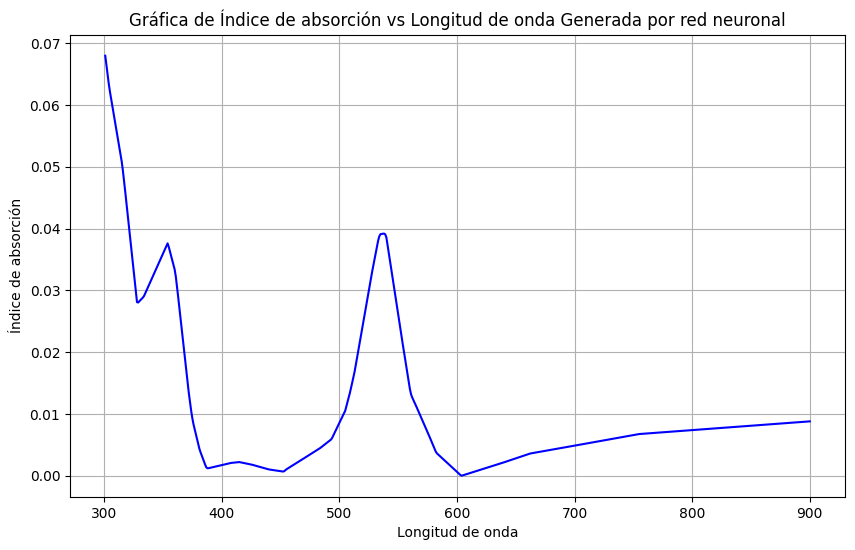

In [29]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = result_df2[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda Generada por red neuronal')
plt.grid(True)
plt.show()

In [30]:
son_iguales = result_df['Índice de absorción'].equals(result_df2['Índice de absorción'])
if son_iguales:
    print("Las columnas son iguales en ambos DataFrames.")
else:
    print("Las columnas no son iguales en ambos DataFrames.")

Las columnas son iguales en ambos DataFrames.
